## Haworth's Gas Ratios

These are very handy mud gas ratios that can be a useful diagnostic tool that can be used whilst drilling or for post drill look backs to determine potential phase and potentially even identifying breached traps.

From: Interpreation of Hydrocarbon Shoes Using Light (C1-C5) Hydrocarbon Gases from Mud Log Data
J. H. Haworth; M. Smellens; A. Whittacker 1985 AAPG

This is probably very in-efficient code and I welcome any feedback.

I'd like to thank the great open source work from Andy McDonald (https://github.com/andymcdgeo) for the inspiration and much of the source code on the plots from his excellent Python Petrophysics series.

## Import Libraries

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Haworth's Ratio's Equations

Ch - Character Calculation:
(iC4 + nC4 + C5)/C3

Wh - Wetness Calculation:
((C2 + C3 + iC4 + nC4 + C5)/(C1 + C2 + C3 + iC4 + nC4 + C5))*100

Bh - Balance Calculation:
(C1 + C2)/(C3 + iC4 + nC4 + C5)

## Import Data as Pandas DataFrame

Here I used a mudlog example from a 2019 drilling campaign.  Column names will require editing depending on your mud log service provider

In [169]:
ratios = pd.read_csv('anonymouswell.csv')

In [170]:
ratios.head()

,Bit Depth,TVD Depth,ROP,ROP m/hr,WOB,WOH,RPM,TORQUE,SPP,FLWpmps T,GAS main,C1,C2,C3,iC4,nC4,iC5,nC5,H2S,CO2
0,12.5,39.68,4.12,14.57,2.2,65.3,70,600,180,319,0.0,0,0,0,0,0,0,0,3,0.4
1,13.0,40.17,3.38,17.73,1.7,40.0,71,657,172,248,0.0,0,0,0,0,0,0,0,2,0.0
2,13.5,40.64,3.20,18.76,1.6,40.2,71,578,167,248,0.0,0,0,0,0,0,0,0,2,0.0
3,14.0,41.13,3.25,18.43,1.2,40.6,71,555,167,248,0.0,0,0,0,0,0,0,0,2,0.0
4,14.5,41.60,3.20,18.76,1.1,40.6,71,563,169,248,0.0,0,0,0,0,0,0,0,2,0.0


## Data may require cleaning

This dataset didn't have any -999 style errors but units of measurement had become confused in the main dataframe which required editing out

In [171]:
"""ratios = ratios.replace('m', np.nan)
ratios.dropna(subset = ["Bit Depth"], inplace=True)
ratios.tail()"""

'ratios = ratios.replace(\'m\', np.nan)\nratios.dropna(subset = ["Bit Depth"], inplace=True)\nratios.tail()'

## Create new columns

These are associated with the respective mud gas ratios

In [172]:
ratios['Character'] = (ratios['iC4'] + ratios['nC4'] + ratios['iC5'] + ratios['nC5']) / ratios['C3']

In [173]:
ratios['Wetness'] = ((ratios['C2'] + ratios['C3'] + ratios['iC4'] + ratios['nC4'] + ratios['iC5'] + ratios['nC5']) / (ratios['C1'] + ratios['C2'] + ratios['C3'] + ratios['iC4'] + ratios['nC4'] + ratios['iC5'] + ratios['nC5'])) * 100

In [174]:
ratios['Balance'] = (ratios['C1'] + ratios['C2']) / (ratios['C3'] + ratios['iC4'] + ratios['nC4']+ ratios['iC5'] + ratios['nC5'])

## Ratio Interpretation

Primary	means of interp is Wetness.

Created a simple logic test ("&" required for multiple conditions in the function instead of "and") replaced the string with integers for the plotting dictionary later but can be left the same and edit the keys if you prefer the definitions in the dataframe

In [175]:
def wetness(Wh):
    
    #<0.5 V. Dry Gas

    #0.5-17.5 Gas, density increases with Wh

    #17.5-40 Oil Density Increases with Wh

    #>40 Residual Oil
    
    if Wh < 0.5:
        return 1 #'Very Dry Gas'
    elif (Wh > 0.5) & (Wh < 17.5):
        return 2 #'Gas, Density increases with Wh'
    elif (Wh > 17.5) & (Wh < 40): 
        return 3 #'Oil Density Increases with Wh'
    elif Wh > 40:
        return 4 #'Residual Oil'
    else:
        pass

In [176]:
ratios["Wh_check"] = ratios.apply(lambda row: wetness(row.Wetness), axis=1)

Bh>Wh
Gas/Oil or Gas/Condensate
Gas Density increases as curves converge

Bh<Wh
Oil density increases as curves converge
Residual Oil

In [177]:
def balance(Bh, Wh):
    
    if Bh > Wh:
        return 5 #'Gas/Oil or Gas/Condensate Gas Density Increases as Curves Converge'
    elif Bh < Wh:
        return 6 #'Oil Density increases as curves converge residual oil'
    else:
        pass

In [178]:
ratios["Bh_check"] = ratios.apply(lambda row: balance(row.Balance, row.Wetness), axis=1)

Ch <0.5
Predicted Gas is correct

Ch >0.5
Gas is associated with oil

In [179]:
def character(Ch):
    
    if Ch < 0.5:
        return 7 #'Predicted Gas is correct'
    elif Ch > 0.5:
        return 8 #'Gas is associated with oil'
    else:
        pass

In [180]:
ratios["Ch_check"] = ratios.apply(lambda row: character(row.Character), axis=1)

## Plotting

Simple plot to show the gas units in place

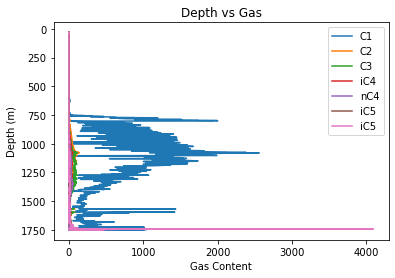

In [181]:
# line 1 points
x1 = ratios["C1"]
y1 = ratios["TVD Depth"]
# plotting the line 1 points 
plt.plot(x1, y1, label = "C1")
# line 2 points
x2 = ratios["C2"]
y2 = ratios["TVD Depth"]
# plotting the line 2 points 
plt.plot(x2, y2, label = "C2")
# line 3 points
x3 = ratios["C3"]
y3 = ratios["TVD Depth"]
# plotting the line 3 points 
plt.plot(x3, y3, label = "C3")
# line 4 points
x4 = ratios["iC4"]
y4 = ratios["TVD Depth"]
plt.plot(x4, y4, label = "iC4")
# plotting the line 3 points
x5 = ratios["nC4"]
y5 = ratios["TVD Depth"]
plt.plot(x5, y5, label = "nC4")
x6 = ratios["iC5"]
y6 = ratios["TVD Depth"]
plt.plot(x6, y6, label = "iC5")
x7 = ratios["nC5"]
y7 = ratios["TVD Depth"]
plt.plot(x7, y7, label = "iC5")

plt.xlabel("Gas Content")
# Set the y axis label of the current axis.
plt.ylabel('Depth (m)')
# Set a title of the current axes.
plt.title('Depth vs Gas')
# show a legend on the plot
plt.legend()
# Display a figure
plt.gca().invert_yaxis()
plt.show()

## Dictionary Definition of Ratio Response

Create a simple dictionary of responses and corresponding colors that relate to the logic tests. This can be changed if you prefer the descriptions mentioned above.

In [182]:
ratio_fluids = {1: {'fluid_num':'Very Dry Gas', 'color':'red'}, #'Very Dry Gas'
                 2: {'fluid_num':'Gas, Density \n increases with Wh', 'color':'pink'}, #'Gas, Density increases with Wh'
                 3: {'fluid_num':'Oil, Density \n Increases with Wh', 'color':'lime'}, #'Oil Density Increases with Wh'
                 4: {'fluid_num':'Residual Oil', 'color':'darkgreen'}, #'Residual Oil'
                 5: {'fluid_num':'Gas/Oil or Gas/Condensate \n Gas Density Increases \n as Curves Converge', 'color':'orange'}, #'Gas/Oil or Gas/Condensate Gas Density Increases as Curves Converge'
                 6: {'fluid_num':'Oil Density \n increases as curves \n converge residual oil', 'color':'teal'}, #'Oil Density increases as curves converge residual oil'
                 7: {'fluid_num':'Predicted Gas is correct', 'color':'yellow'}, #'Predicted Gas is correct'
                 8: {'fluid_num':'Gas is associated with oil', 'color':'blue'}, #'Gas is associated with oil'
                 }

## Main Plots

Create sub-plots that reference the keys and corresponding reference columns

In [183]:
def makeplot(well, top_depth, bottom_depth):
    fig, ax = plt.subplots(figsize=(15,10))

    #Set up the plot axes
    ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
    ax2 = ax1.twiny()
    ax3 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1, sharey = ax1)
    ax4 = plt.subplot2grid((1,4), (0,2), rowspan=1, colspan = 1, sharey = ax1)
    ax5 = plt.subplot2grid((1,4), (0,3), rowspan=1, colspan = 1, sharey = ax1)

    # Wh curve
    ax1.plot(ratios["Wetness"], ratios['TVD Depth'], color = "green", linewidth = 0.5)
    ax1.set_xlabel("Wetness Curve")
    ax1.xaxis.label.set_color("green")
    ax1.set_xscale('log')
    ax1.set_xlim(0.1, 1)
    ax1.set_ylabel("Depth (m)")
    ax1.tick_params(axis='x', colors="green")
    ax1.spines["top"].set_edgecolor("green")
    ax1.title.set_color('green')
    ax1.set_xticks([1, 10, 100])
    
    # Bh Curve
    ax2.plot(well["Balance"], ratios['TVD Depth'], color = "orange", linewidth = 0.5)
    ax2.set_xlabel("Balance Curve")
    ax2.set_xscale('log')
    ax2.set_xlim(0.1, 1)
    ax2.xaxis.label.set_color("orange")
    ax2.tick_params(axis='x', colors="orange")
    ax2.spines["top"].set_edgecolor("orange")
    ax2.set_xticks([1, 10, 100])

    # Wetness
    ax3.plot(ratios["Wh_check"], ratios['TVD Depth'], color = "black", linewidth = 0.5)
    ax3.set_xlabel("Wh")
    ax3.set_xlim(0, 1)
    ax3.xaxis.label.set_color("black")
    ax3.tick_params(axis='x', colors="black")
    ax3.spines["top"].set_edgecolor("black")

    for key in ratio_fluids.keys():
        color = ratio_fluids[key]['color']
        ax3.fill_betweenx(ratios['TVD Depth'], 0, ratios['Wh_check'], where=(ratios['Wh_check']==key),
                         facecolor=color)

    # Balance
    ax4.plot(ratios["Bh_check"], ratios['TVD Depth'], color = "black", linewidth = 0.5)
    ax4.set_xlabel("Bh")
    ax4.set_xlim(0, 1)
    ax4.xaxis.label.set_color("black")
    ax4.tick_params(axis='x', colors="black")
    ax4.spines["top"].set_edgecolor("black")

    for key in ratio_fluids.keys():
        color = ratio_fluids[key]['color']
        ax4.fill_betweenx(ratios['TVD Depth'], 0, ratios['Bh_check'], where=(ratios['Bh_check']==key),
                         facecolor=color)
    
    # Character
    ax5.plot(ratios["Ch_check"], ratios['TVD Depth'], color = "black", linewidth = 0.5)
    ax5.set_xlabel("Ch")
    ax5.set_xlim(0, 1)
    ax5.xaxis.label.set_color("black")
    ax5.tick_params(axis='x', colors="black")
    ax5.spines["top"].set_edgecolor("black")

        
    for key in ratio_fluids.keys():
        color = ratio_fluids[key]['color']
        ax5.fill_betweenx(ratios['TVD Depth'], 0, ratios['Ch_check'], where=(ratios['Ch_check']==key),
                         facecolor=color) 

    ax3.set_xticks([0, 1])
    ax4.set_xticks([0, 1])
    ax5.set_xticks([0, 1])

    # Common functions for setting up the plot can be extracted into
    # a for loop. This saves repeating code.
    for ax in [ax3, ax4, ax5]:
        ax.set_ylim(bottom_depth, top_depth)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.spines["top"].set_position(("axes", 1.02))
        
        
    for ax in [ax3, ax4, ax5]:
        plt.setp(ax.get_yticklabels(), visible = False)
        
    plt.tight_layout()
    fig.subplots_adjust(wspace = 0.15)

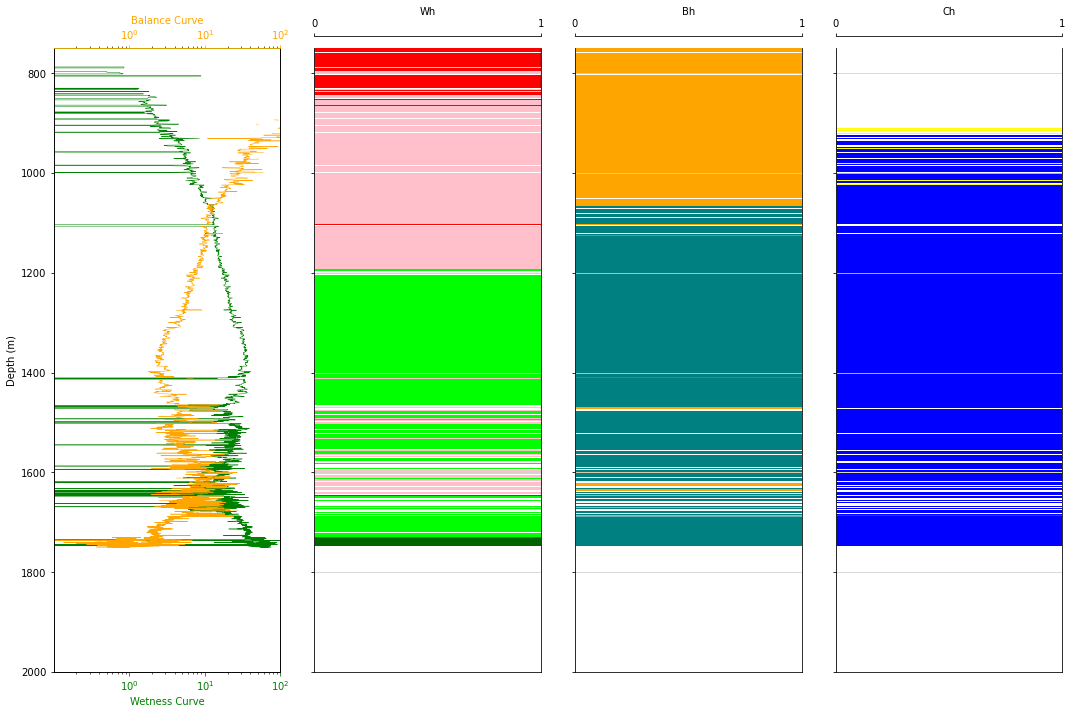

In [184]:
makeplot(ratios, 750, 2000) # args are dataframe, top depth and base depth

## Insert Legend Chart

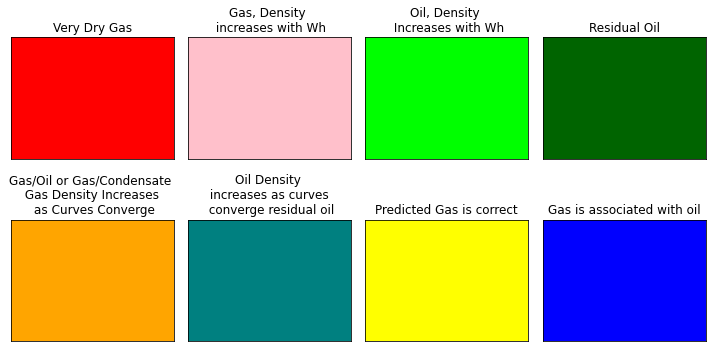

In [110]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=2, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, ratio_fluids.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=ratio_fluids[key]['color'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(ratio_fluids[key]['fluid_num']))

plt.tight_layout()

plt.show()